In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl

from MyPhidlFunctions import *
from resonator import ChipResonatorsTline
from approx_Schuster import *

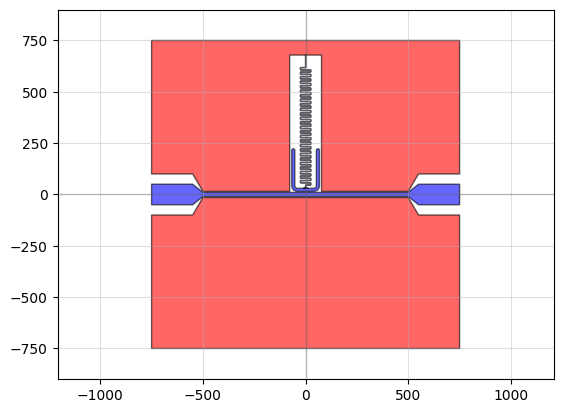

'OneResonatorTest_Higher_Cc.gds'

In [7]:

Chipsize = [1500,1500]
SeparationTlineResonator = 0
NumberOfResonators = 1
FeedlineWidth = 20
FeedlineLength  = 1000
FeedlineGap = 5
FeedlineTaperLength =  50
BondpadWidth =  100
BondpadLength = 200
BondpadGap = 50

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*120
CapacitorVerticalLength = np.ones(NumberOfResonators)*200
CapacitorWidth = np.ones(NumberOfResonators)*15

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*50
InductorVerticalLength = np.ones(NumberOfResonators)*11
InductorHorizontalLength = np.ones(NumberOfResonators)*50
InductorEndLength = 50*np.ones(NumberOfResonators)
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*NumberOfBends
InductorWidth = np.ones(NumberOfResonators)*1
TaperWidth = np.ones(NumberOfResonators)*20
SpacingC0 = np.ones(NumberOfResonators)*10
SpacingCc = np.ones(NumberOfResonators)*0
TaperLength = np.ones(NumberOfResonators)*5


c, metal,chip = ChipResonatorsTline(Chipsize, NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc)

# qp([c, metal])
qp(chip)
chip.write_gds("OneResonatorTest_Higher_Cc.gds")

In [10]:
epsilon_r = 11.9
thickness_subs = 500e-6
ind_kin_sq = 5e-12
print(f' Imp: {impedance_Schuster(CapacitorWidth*1e-6, CapacitorHorizontalLength*1e-6, (SeparationTlineResonator + FeedlineGap + SpacingCc)*1e-6 , InductorWidth*1e-6, InductorTotalLength*1e-6, SpacingC0*1e-6, epsilon_r, thickness_subs, ind_kin_sq)} Ohm')
FeedlineGap = 5
print(f'Freq: {1e-9*resonance_freq_Schuster(CapacitorWidth*1e-6, CapacitorHorizontalLength*1e-6, SeparationTlineResonator*1e-6 + SpacingCc*1e-6 + FeedlineGap*1e-6, InductorWidth*1e-6, InductorTotalLength*1e-6, SpacingC0*1e-6, epsilon_r, thickness_subs, ind_kin_sq)} GHz')

 Imp: [147.56445493] Ohm
Freq: [39.6875105] GHz


In [11]:
epsilon_r = 11.9
thickness_subs = 500e-6
ind_kin_sq = 100e-12
print(f' Imp: {impedance_Schuster(CapacitorWidth*1e-6, CapacitorHorizontalLength*1e-6, (SeparationTlineResonator + FeedlineGap + SpacingCc)*1e-6 , InductorWidth*1e-6, InductorTotalLength*1e-6, SpacingC0*1e-6, epsilon_r, thickness_subs, ind_kin_sq)} Ohm')
print(f'Freq: {1e-9*resonance_freq_Schuster(CapacitorWidth*1e-6, CapacitorHorizontalLength*1e-6, SeparationTlineResonator*1e-6 + SpacingCc*1e-6 +FeedlineGap*1e-6, InductorWidth*1e-6, InductorTotalLength*1e-6, SpacingC0*1e-6, epsilon_r, thickness_subs, ind_kin_sq)} GHz')

 Imp: [547.87823686] Ohm
Freq: [10.68935661] GHz


In [95]:
np.sqrt(100/5)

4.47213595499958

In [96]:
39.01/25.18

1.5492454328832406